<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "6" #@param {type:"string"}
Student_ID&Name = "9309888_JohnHayes" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [4]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import spacy
import datetime

In [6]:
!pip install gpy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Any functions used later on

In [42]:
#----------------------------------------------------
def nlp_preprocess():
    return

#----------------------------------------------------
def nlp_preprocess1():
    """
    Convert a collection of raw documents to a matrix of TF-IDF features.
    """
    return

def run_model(x_data, y_data, iterations, sample_size, text=None):
    """
    Execute the model for a given data set
    """
    
    if text != None:
        print(text)
    
    with pm.Model() as model:
        
        # prior over the parameters of linear regression
        alpha = pm.Normal('alpha', mu=0, sigma=30)
  
        # we have a beta for each column of Xn0
        beta = pm.Normal('beta', mu=0, sigma=30, shape=x_data.shape[1])
  
        # prior over the variance of the noise
        sigma = pm.HalfCauchy('sigma_n', 5)
  
        # linear regression relationship
        # linear regression model in matrix form
        mu = alpha + pm.math.dot(beta, x_data.T)
        
        # likelihood, be sure that observed is a 1d vector
        like = pm.Normal('like', mu=mu, sigma=sigma, observed=y_data[:,0])
        
    with model:
        
        # iterations of the algorithm
        approximation = pm.fit(iterations,method='advi')

    # samples from the posterior   
    posterior = approximation.sample(sample_size)
    
    return posterior, approximation


#------------------------------------------------------------
def ppc(alpha, beta, sigma, X, nsamples=500):
    """
    Posterior predictive checks (PPCs)
    """
    
    # Select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        
        # we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T + \
                                    np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
        
    return Ypred


#------------------------------------------------------------
def train_cluster(x_train, x_test, clust_num):
    """
    Train the cluster
    """
    
    Xn = x_train[clusters_train==clust_num,:]
    Xtestn = x_test[clusters_test==clust_num,:]

    ylog = np.log(ys_train.astype('float')[clusters_train==clust_num,:])
    yscaler = StandardScaler().fit(ylog)
    yn = yscaler.transform(ylog)
    
    return ylog, yscaler, Xn, yn, Xtestn, yscaler


#------------------------------------------------------------
def plot_redictions(y_pred, ylog, title=None):
    
    plt.figure(figsize=(9,8))
    for i in range(y_pred.shape[0]):
        az.plot_dist( y_pred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
        
    az.plot_dist(y_pred[i,:],color='r',
                 plot_kwargs={"linewidth": 0.2},
                 label="prediction")
    
    az.plot_dist(ylog, label='true observations');
    if title != None:
        plt.title(title)
        
    plt.legend()
    plt.xlabel("log(y) - output variable")
    plt.ylabel("density plot");


#------------------------------------------------------------
def cluster_sim(posterior, Xn, ylog, title=None, num_samples=200):
    """
    Display a prediction for a single cluster
    """
    
    # Simulation
    Ypred = yscaler.inverse_transform(ppc(posterior['alpha'],
                                            posterior['beta'],
                                            posterior['sigma_n'],
                                            Xn,
                                            nsamples=num_samples))
    plot_redictions(Ypred, ylog, title)
    

#------------------------------------------------------------
def create_heat_map(data):
    """
    Create a correlation matrix
    """
    
    # Plot the heatmap. The numbers are easier to read IMO
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            ax=ax)
    

In [44]:
print("Start time {}".format(datetime.datetime.now().time()))

Start time 22:20:29.878580


#### Some variables that will be used throughout

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

num_iter = 50000
sample_size = 5000
num_of_clust_samples = 200

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

#### Load the data

In [10]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Path, copy the path from your Drive
    Path = '/content/drive/MyDrive/Colab Notebooks/Etivity3-Data/'
    
else:
    Path = "./Data/"
    
# House price data from csv files
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

df_train_data = pd.read_csv(train_data)
print("Training data {}".format(df_train_data.shape))

# Test data
df_test_data = pd.read_csv(test_data)
print("Test data {}".format(df_test_data.shape))

Training data (1638, 14)
Test data (702, 13)


### Train dataset

In [11]:
# show first data frame rows 
df_train_data.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [12]:
# Generate descriptive statistics
df_train_data.describe(include='all')

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
count,1638.000000,1.638000e+03,1638,1638.000000,1638.000000,1387,1638,577,1638,1638.000000,1638.000000,1638,1638.000000,1.638000e+03
unique,NaN,NaN,142,NaN,NaN,16,1638,31,1118,NaN,NaN,10,NaN,NaN
top,NaN,NaN,Castleknock,NaN,NaN,D1,DNG are delighted to present to the market no....,"Parking,Gas Fired Central Heating",None,NaN,NaN,semi-detached,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,182,1,118,516,NaN,NaN,458,NaN,NaN
mean,819.500000,1.231930e+07,NaN,2.054335,3.043346,NaN,NaN,NaN,NaN,53.350473,-6.255086,NaN,169.540695,5.547196e+05
std,472.994186,1.447540e+05,NaN,1.241259,1.379650,NaN,NaN,NaN,NaN,0.076832,0.144430,NaN,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,52.501856,-6.497000,NaN,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,53.294261,-6.309613,NaN,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,53.341386,-6.247780,NaN,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,NaN,3.000000,4.000000,NaN,NaN,NaN,NaN,53.382031,-6.193982,NaN,135.000000,5.950000e+05


So there are 1638 entries. Both `BER_class` and `Services` have less than that. The `Services` is missing a lot of entries.

In [13]:
# Check for missing values
df_train_data.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

Since `Services` is missing over 60% of entries and there is no reasonable way to fill in values for that feature, given what it is used for, I think it should be dropped from the evaluation.

In [14]:
df_train_data['BER_class'].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [15]:
df_train_data['Num_Beds'].value_counts()

3     558
2     464
4     348
1     114
5     107
6      29
7      11
9       2
15      2
8       2
27      1
Name: Num_Beds, dtype: int64

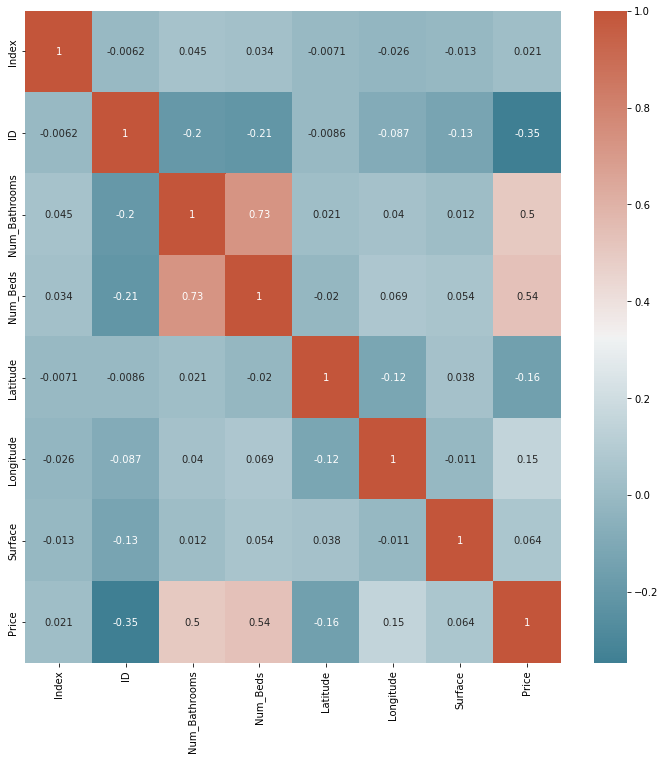

In [16]:
create_heat_map(df_train_data)

The above is showing little correlation between the various features, with the only significant ones being the number of `Num_Beds` and `Num_Bathrooms` related to `price`.

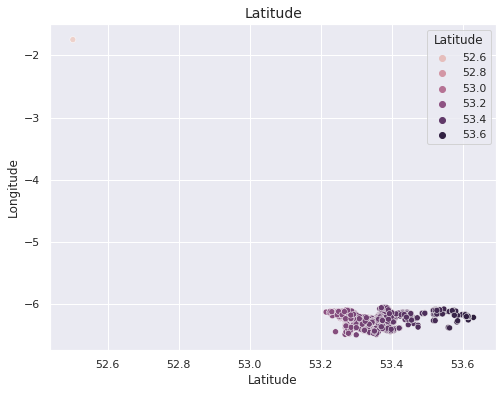

In [17]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=df_train_data,x='Latitude', y='Longitude', hue='Latitude')
plt.title("Latitude", fontsize=14)
plt.show()

The above is showing 1 outlier. It is in row 357 with lonitude of -1.744995 latitude of 52.5018563. This is showing as 34-12 Wheatfield Cl, Birmingham B36 0QP, UK, so I will drop this value.

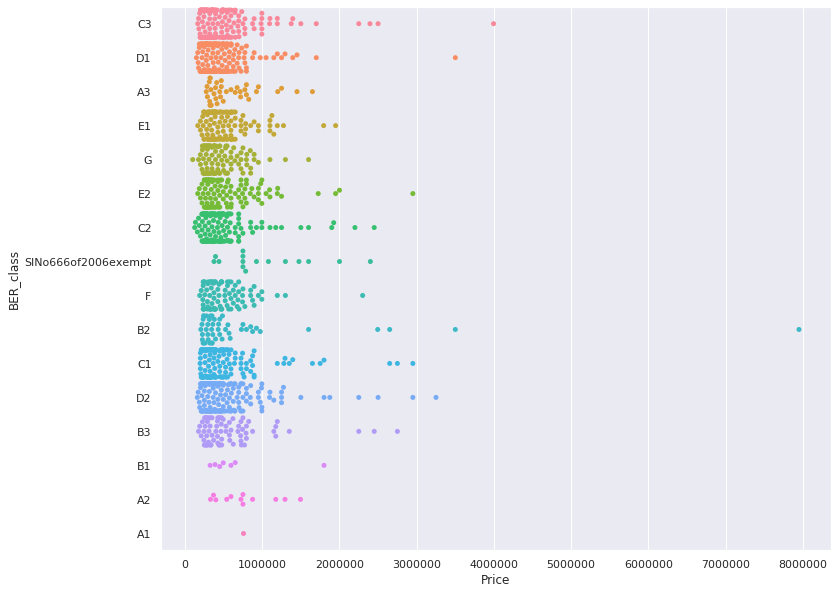

In [18]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.swarmplot(data=df_train_data, x='Price', y='BER_class')
plt.show()

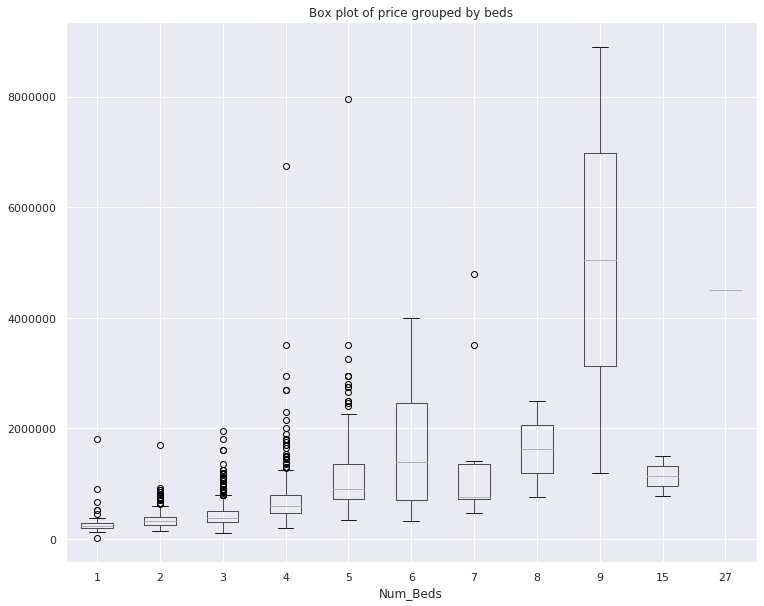

In [19]:
df_train_data.boxplot(column='Price', by='Num_Beds')
plt.title('Box plot of price grouped by beds')
plt.suptitle("")
plt.show()

In [20]:
# split data into training and test
#from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'X' is not defined

In [21]:
# training dataset: 
#training_file = syntPath+filename1
# test dataset: 
#testing_file = syntPath+filename2
# cost dataset: 
#cost_file = syntPath+filename3

### Test dataset

In [22]:
# show first data frame rows 
df_test_data.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [23]:
# Generate descriptive statistics
df_test_data.describe(include='all')

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
count,702.000000,7.020000e+02,702,702.000000,702.000000,594,702,246,702,702.000000,702.000000,702,702.000000
unique,NaN,NaN,129,NaN,NaN,15,702,27,506,NaN,NaN,9,NaN
top,NaN,NaN,Rathfarnham,NaN,NaN,D1,OMD Estate Agents are delighted to present thi...,"Parking,Gas Fired Central Heating",None,NaN,NaN,apartment,NaN
freq,NaN,NaN,28,NaN,NaN,72,1,51,197,NaN,NaN,194,NaN
mean,1989.500000,1.231545e+07,NaN,2.027066,2.987179,NaN,NaN,NaN,NaN,53.350445,-6.252411,NaN,132.603530
std,202.794231,1.420680e+05,NaN,1.071273,1.198480,NaN,NaN,NaN,NaN,0.073961,0.091600,NaN,330.347066
min,1639.000000,1.147889e+07,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,53.214227,-6.521183,NaN,32.100000
25%,1814.250000,1.227637e+07,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,53.295225,-6.304258,NaN,73.000000
50%,1989.500000,1.237928e+07,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,53.341153,-6.247799,NaN,99.200000
75%,2164.750000,1.240421e+07,NaN,3.000000,4.000000,NaN,NaN,NaN,NaN,53.381751,-6.184277,NaN,136.875000


In [24]:
# Check for missing values
df_test_data.isna().sum()

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Services         456
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
dtype: int64

As with the training data, since `Services` is missing over 50% of entries and there is no reasonable way to fill in values for that feature, given what it is used for, I think it should be dropped from the evaluation.

In [25]:
df_test_data['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
A2                      8
SINo666of2006exempt     8
B1                      7
Name: BER_class, dtype: int64

### Data Preparation <a id='data_preparation'></a>
* Remove anything with more than 6 beds and those that have no number specified.
* Remove anything with no `Num_Bathroom` value set.
* Remove `Services` since there are so many values missing.
* Remove the invalid long & lat entry.
* Apply some NLP examination to `Description`, `Features` and `Type` attributes.

In [30]:
df_train_clean = df_train_data.drop(columns=['Services'])
df_test_clean = df_test_data.drop(columns=['Services'])

# The Longitude & latitude outlier from above
df_train_clean = df_train_clean.drop(df_train_clean[(df_train_clean.Longitude > -5) |
                                              (df_train_clean.Latitude < 52)].index)

Look again at the spread of houses with the longitude and latitude outlier removed.

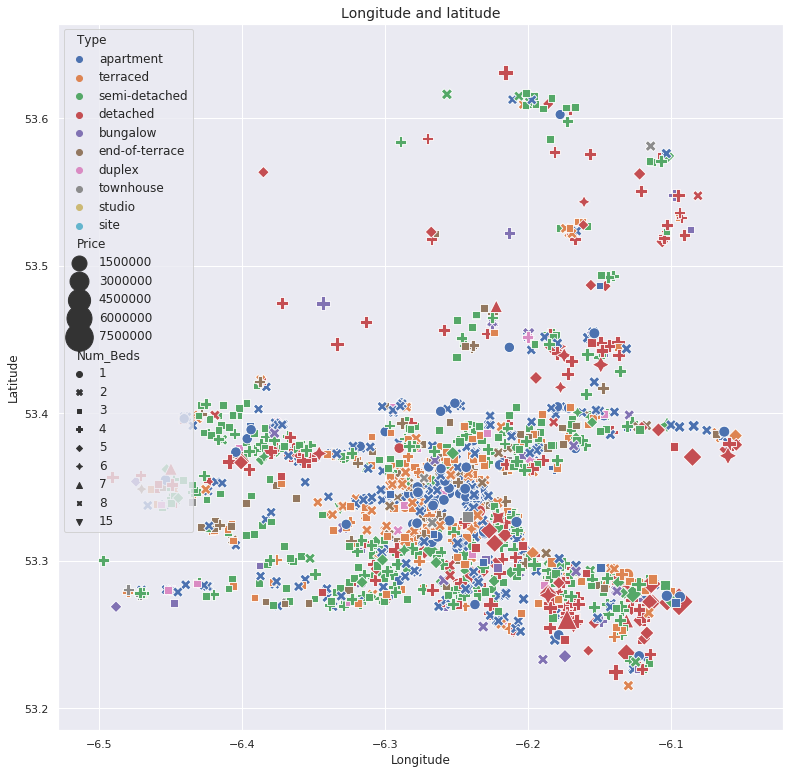

In [47]:
sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(data=df_train_clean,
                x='Longitude',
                y='Latitude',
                style='Num_Beds',
                size="Price",
                hue="Type",
                sizes=(100, 800))

plt.title("Longitude and latitude", fontsize=14)
plt.show()

#### Continue with the preperation <a id='continue_cleaning'></a>
Convert `BER_class` into numerical formats. I think the increasing number in `BER_class` is justified as that what the classification is - I.E an increasing number means it uses more energy.

In [36]:
# Replace all ber values with equivalant decimal values. Last value is 'nan' so ignore that
df_train_clean.dropna(subset=['BER_class'], inplace=True)
ber_features = df_train_clean['BER_class'].sort_values().unique()

new_ber_values = np.arange(1, len(ber_features) + 1).tolist()

df_train_clean['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

df_test_clean.dropna(subset=['BER_class'], inplace=True)
df_test_clean['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

#### Look again at the cleaned data.

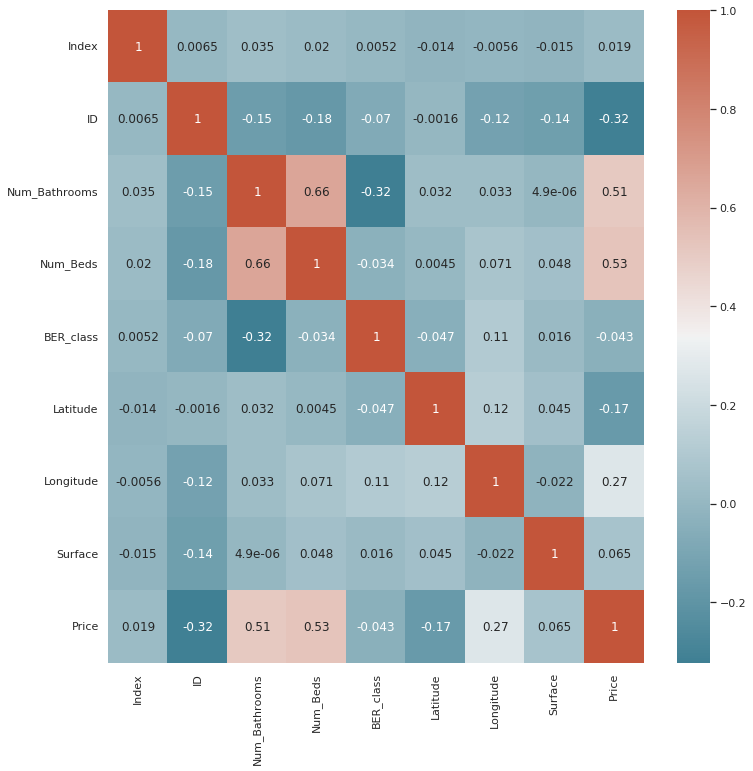

In [37]:
create_heat_map(df_train_clean)

In [38]:
print("Cleaned training missing values")
df_train_clean.isna().sum()

Cleaned training missing values


Index            0
ID               0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
dtype: int64

In [40]:
df_train_clean.describe(include='all')

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
count,1387.000000,1.387000e+03,1387,1387.000000,1387.000000,1387.000000,1387,1387,1387.000000,1387.000000,1387,1387.000000,1.387000e+03
unique,NaN,NaN,137,NaN,NaN,NaN,1387,998,NaN,NaN,10,NaN,NaN
top,NaN,NaN,Castleknock,NaN,NaN,NaN,DNG are delighted to present to the market no....,None,NaN,NaN,semi-detached,NaN,NaN
freq,NaN,NaN,53,NaN,NaN,NaN,1,388,NaN,NaN,399,NaN,NaN
mean,823.229993,1.232015e+07,NaN,2.045422,3.031002,9.897621,NaN,NaN,53.349563,-6.254741,NaN,176.248536,5.421249e+05
std,470.617527,1.417111e+05,NaN,1.127557,1.190895,3.101862,NaN,NaN,0.074343,0.091399,NaN,1946.329376,4.587390e+05
min,1.000000,1.118567e+07,NaN,1.000000,1.000000,1.000000,NaN,NaN,53.215381,-6.497000,NaN,22.450000,1.000000e+05
25%,420.500000,1.228091e+07,NaN,1.000000,2.000000,8.000000,NaN,NaN,53.292078,-6.304369,NaN,74.100000,3.000000e+05
50%,826.000000,1.238027e+07,NaN,2.000000,3.000000,10.000000,NaN,NaN,53.340399,-6.244568,NaN,98.300000,4.150000e+05
75%,1225.000000,1.240469e+07,NaN,3.000000,4.000000,12.000000,NaN,NaN,53.380564,-6.188047,NaN,136.505000,5.999500e+05


In [39]:
print("Cleaned testing missing values")
df_test_clean.isna().sum()

Cleaned testing missing values


Index            0
ID               0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
dtype: int64

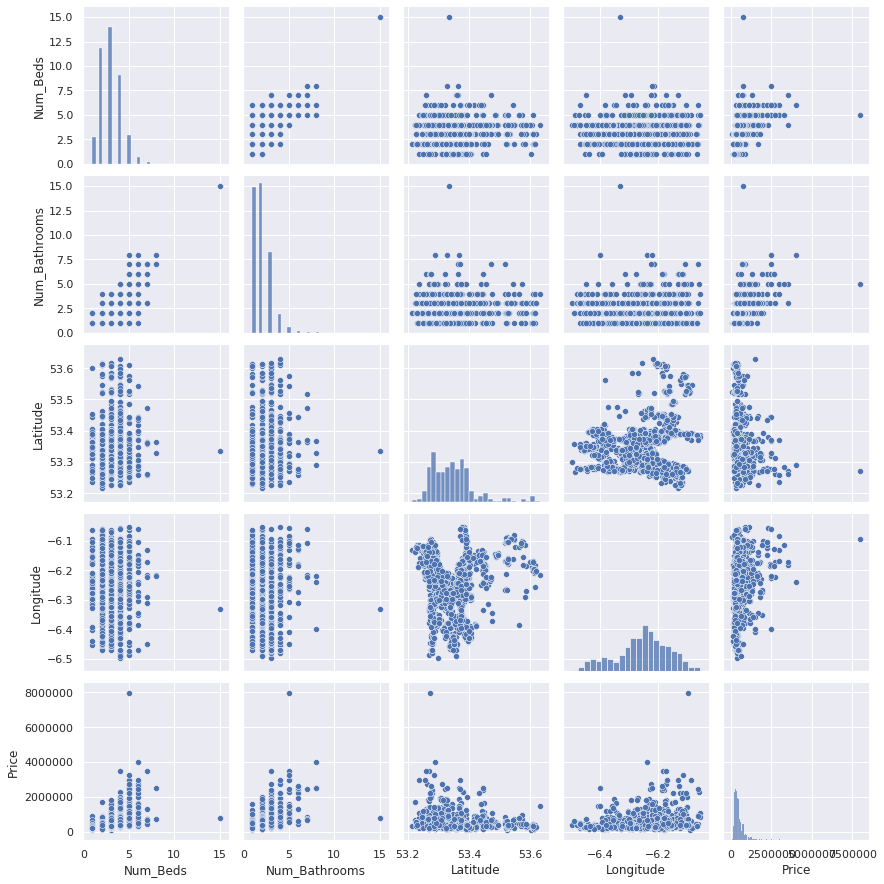

In [41]:
sns.pairplot(data=df_train_clean[['Num_Beds','Num_Bathrooms', 'Latitude', 'Longitude', 'Price']])

# NATURAL LANGUAGE PROCESSING <a id='nlp_processing'></a>

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Now apply some NLP examination to the `Description`, `Features` and `Type` attributes.

In [ ]:
# your code here
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

In [ ]:
# example: remove anything that is not a letter
#string_sample = '123This @45is 890-130 an_example !!'
#new_string = re.sub('[^a-zA-Z]', ' ', string_sample) 
#print(new_string)

TfidfVectorizer - Convert a collection of raw documents to a matrix of **T**erm **F**requency-**I**nverse **D**ocument **F**requency features.I.E How relevant a word is to a document in a collection of documents.<br>
I will try to see if I can apply this to the `Description` features from each column.

In [ ]:

vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
print(vectorizer)

In [ ]:
X = vectorizer.fit_transform(df_train_data['Description'])
X.shape

TBC ... Shouldn't be removing digits from the description/features like in the spam example. Might need that info.

### NLP Expected Cost dataset
The expected output for submission to kaggle is a CSV with Index,Price as the only 2 columns.

In [28]:
# Generate descriptive statistics
#dfcost.describe()

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

BNN's are Stochastic artificial neural networks trained using Bayesian methods. A stochastic NN is built by introducing randon variables into the network. This is generally done by using random activation functions or weights. This will allow you to simulate multiple possible models, so you can get a group (ensemble) of outcomes/learning. The reason for simulating multiple models is to be able to combine the predictions of the various models instead of 1 possibly better predicting model.
The main goal of SNN is to get a better idea of the uncertainty.

In [ ]:
# your code here

# SUMMARY

### Basic understanding

#### General
For the [nlp_processing](#nlp_processing) section, I ...

#### Peer Contribution

### References
#### Websites
#### Books/Papers
* Laurent Valentin Jospin, Hamid Laga, Farid Boussaid, Wray Buntine, Mohammed Bennamoun, "Hands-on Bayesian Neural Networks – a Tutorial for Deep Learning Users" September 2021 https://arxiv.org/pdf/2007.06823.pdf